In [56]:
import pandas as pd
import numpy as np
from numpy import diff

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})


# set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [57]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data.dtypes

In [58]:
# data = data[(data['MW'] >= 5.1)]

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [59]:
# downgoing plate

data_dgoing = data.loc[data['CLASS'] == 'DGOING']
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 10) & (data_dgoing['YEARS'] > -25)]

In [60]:
## Deep Java slab
data_dgoing_java = data_dgoing[(data_dgoing['LAT'] < -1) &
                         (data_dgoing['DEPTH'] > 50)]

## calculate seismic energy
dg_exp_java = np.asarray(data_dgoing_java['EX'])
dg_mo_java = np.asarray(data_dgoing_java['MO'])
dg_time_java = np.asarray(data_dgoing_java['YEARS'])
dg_energy_java = dg_mo_java*np.power(10., dg_exp_java)
dg_energy_java_cum = np.cumsum(dg_energy_java)

In [61]:
## Deep sumatra slab

data_dgoing_sum = data_dgoing[(data_dgoing['LAT'] < 15) & (data_dgoing['LAT'] >= -1) &
                         (data_dgoing['DEPTH'] > 50)]

## calculate seismic energy
dg_exp_sum = np.asarray(data_dgoing_sum['EX'])
dg_mo_sum = np.asarray(data_dgoing_sum['MO'])
dg_time_sum = np.asarray(data_dgoing_sum['YEARS'])
dg_energy_sum = dg_mo_sum*np.power(10., dg_exp_sum)
dg_energy_sum_cum = np.cumsum(dg_energy_sum)

In [62]:
## megathrust earthquakes

data_mthrust = data.loc[data['CLASS'] == 'MTHRUST']
# data_mthrust = data_mthrust[(data_mthrust['TYPE'] == 'THRUST') & (data_mthrust['TYPE'] == 'O_THRUST')]

data_mthrust = data_mthrust[(data_mthrust['LAT'] < 15) & (data_mthrust['LON'] < 105)]

## calculate seismic energy
mthrust_exp_total = np.asarray(data_mthrust['EX'])
mthrust_mo_total = np.asarray(data_mthrust['MO'])
mthrust_time_total = np.asarray(data_mthrust['YEARS'])
mthrust_energy_total = mthrust_mo_total*np.power(10., mthrust_exp_total)
mthrust_energy_total_cum = np.cumsum(mthrust_energy_total)

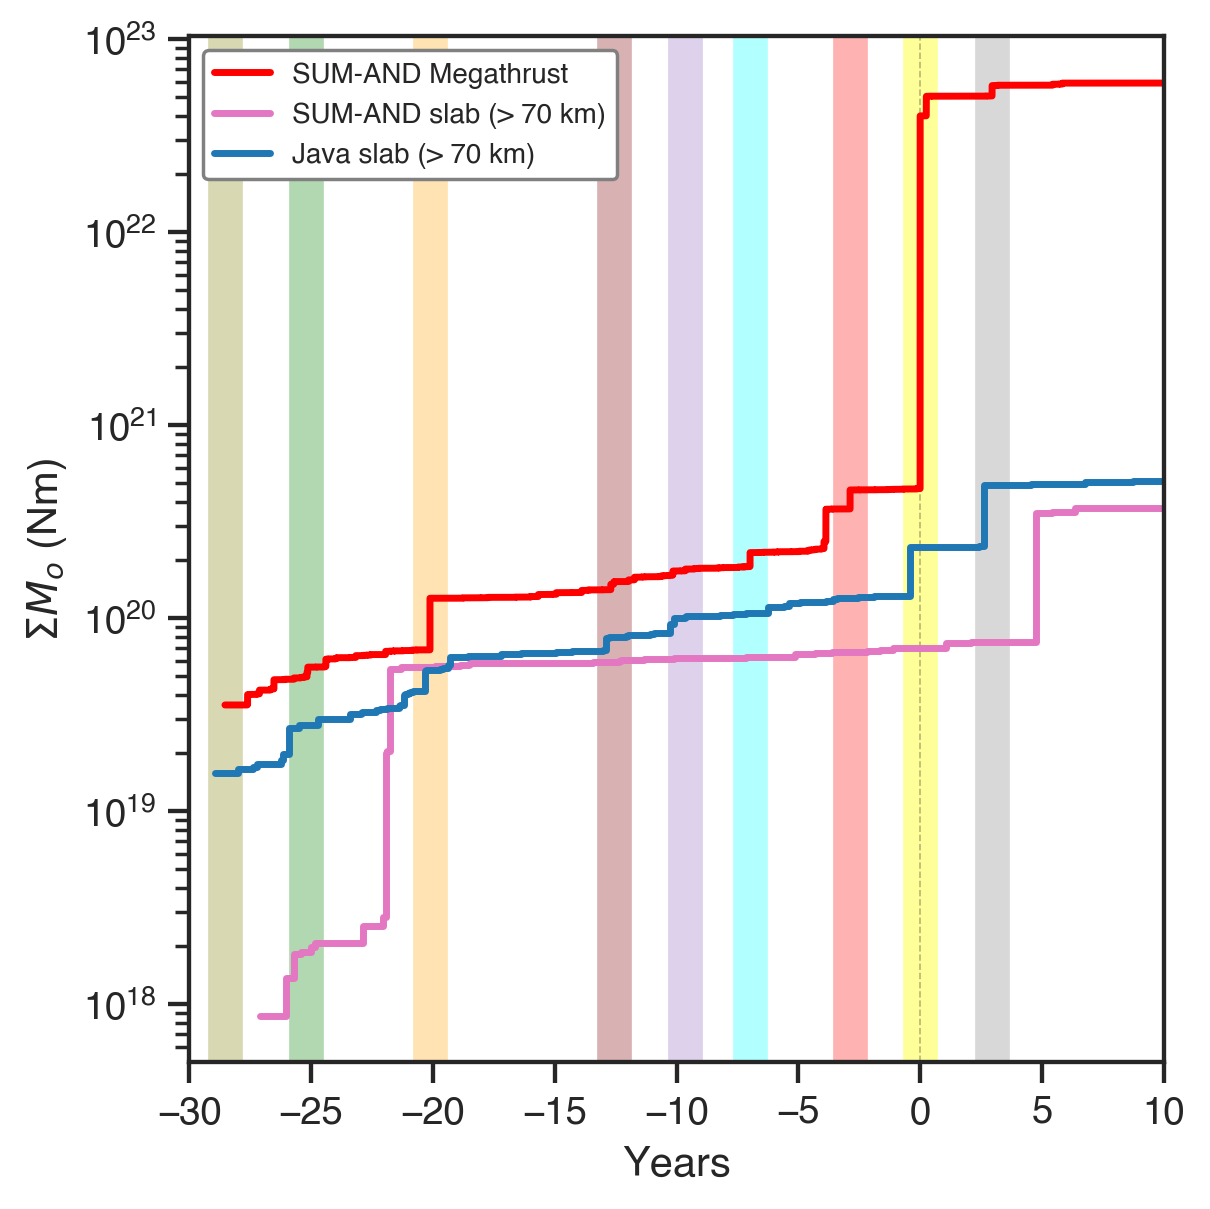

In [63]:
# plot
figsize = (5,5)
dpi=250
# lw = 1.5

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1 = ax

lw = 10
alpha=0.3
# bands left to right
fig1.axvline(x=-28.536944, color='olive', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-25.2, color='green', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-20.120661, color='orange', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-12.574554, color='maroon', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-9.635957, color='tab:purple', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-2.874320, color='red', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=0, color='yellow', lw=lw, ls='-', alpha=0.4)
fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=alpha)
fig1.axvline(x=2.953983, color='grey', lw=lw, ls='-', alpha=alpha)



############### Sumatra megathrust ####################
new_t = []
for i, s in enumerate(mthrust_time_total):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(mthrust_energy_total_cum):
    if i != 0:
        new_y.append(mthrust_energy_total_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

fig1.plot(new_t, new_y, '-', color = 'red', lw = 2, label='SUM-AND Megathrust')


# ################ Sumatra slab (> 70 km) ############################
new_t = []
for i, s in enumerate(dg_time_sum):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(dg_energy_sum_cum):
    if i != 0:
        new_y.append(dg_energy_sum_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

fig1.plot(new_t, new_y, '-', color = 'tab:pink', lw = 2, label='SUM-AND slab (> 70 km)')


################ Java slab (> 70 km) ############################
new_t = []
for i, s in enumerate(dg_time_java):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(dg_energy_java_cum):
    if i != 0:
        new_y.append(dg_energy_java_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

fig1.plot(new_t, new_y, '-', color = 'tab:blue', lw = 2, label='Java slab (> 70 km)')


fig1.set_yscale('log')

fig1.set_xlim([-30, 10])
# fig1.set_ylim([1e18, 1e23])

fig1.legend(loc = 'upper left',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="grey",
            markerscale=1)

fig1.set_xlabel('Years')
fig1.set_ylabel(r'$\Sigma M_o$ (Nm)')

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/mt_slab_time-series.pdf"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Seismicity rate

(-27.0, 4.0)

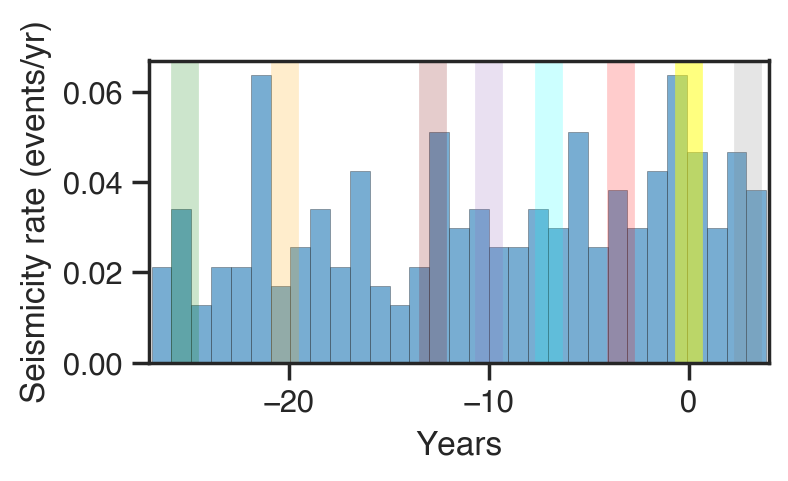

In [64]:
# plot
figsize = (4,2)
dpi=200
# lw = 1.5

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1 = ax


data_dgoing_java = data_dgoing[(data_dgoing['YEARS'] >= -27) & (data_dgoing['YEARS'] <= 4) &
                         (data_dgoing['DEPTH'] > 70)]

all_dgoing_java = data_dgoing_java.groupby('YEARS').size()

# normalized_all_dgoing = (all_dgoing_java - np.min(all_dgoing_java)) / (np.max(all_dgoing_java) - np.min(all_dgoing_java))

# # Normalize the thrust earthquake counts by dividing by the total number of earthquakes
# normalized_all_dgoing = all_dgoing_java / all_dgoing_java.sum()

bins = 31
alpha = 0.6
lw=2

# fig1.hist(all_dgoing_java.index, bins=bins, weights=all_dgoing_java.values,
#           edgecolor='k', lw=1, alpha=alpha, color='tab:blue', label='Long slab (> 70 km)')

# all_dgoing_java = data_dgoing_java['YEARS']
# fig1.hist(all_dgoing_java,  bins=bins, histtype='step', cumulative=True,
#           color='tab:blue', linewidth=lw, label='Long slab (> 70 km)')


## seismicity rate

total_yrs = 31

seismicity_rate_java = all_dgoing_java / total_yrs

fig1.hist(seismicity_rate_java.index, bins=bins, weights=seismicity_rate_java.values,
          density=True,
          edgecolor='k', lw=0.2, alpha=alpha, color='tab:blue')


# fig1.legend(loc = 'upper right',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=1)

lw = 10
alpha=0.2
# bands left to right
fig1.axvline(x=-25.2, color='green', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-20.2, color='orange', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-12.8, color='maroon', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-10, color='tab:purple', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-3.4, color='red', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=0, color='yellow', lw=lw, ls='-', alpha=0.5)
# fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=0.8)
fig1.axvline(x=2.95, color='grey', lw=lw, ls='-', alpha=alpha)


fig1.set_xlabel('Years')
fig1.set_ylabel('Seismicity rate (events/yr)')

fig1.set_xlim([-27, 4])

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/hist_Java_deep.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Background seismicity

In [65]:
## load declustered data

data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/stat-seismo-main/data/sum_20_all_nnd.h5")
# data = data[(data['magnitude'] >= 4.8)]
data.sort_values(by = 'magnitude', ascending = False, inplace = True)

data["second"] = data["seconde"]
data["date"] = pd.to_datetime(data[["year", "month", "day", "hour", "minute", "second"]]) # change dtype to datetime format

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mohd0001/PhD_Monash/Paper2/stat-seismo-main/data/sum_20_all_nnd.h5'

In [ ]:
## select reference date, i.e. 2004 mainshock
selected_value = UTCDateTime(data["date"].loc[1513]) # or replace this with any value you want as a reference point
years_passed = []

for idx, row in data["date"].iteritems():
    years_passed.append(UTCDateTime(row) - selected_value)

years_passed = np.array(years_passed)/31536000

data["YEARS"] = years_passed
data = data.sort_values(by = "YEARS", ascending = True)
data["Days"] = data['YEARS']*365

# change the reference from the center of the earth to the surface of the earth
data['depth'] = 6371- data['depth']

In [ ]:
data = data[(data['YEARS'] >= -27) & (data['YEARS'] <= 4) &
           (data['depth'] < 70) & (data['magnitude'] >= 1)]

In [ ]:
print(data.magnitude.min())
print(data.magnitude.max())

In [ ]:
thresh = 10**-3.5 # to differentiate background seismicity and aftershocks

data_java = data[(data['latitude'] < -2)]

# select foreshock/aftershock seismicity by apply threshold
data_foreshock_java = data_java[(data_java["Nij"] < thresh)]
data_background_java = data_java[(data_java["Nij"] > thresh)]

count_foreshock_java = data_foreshock_java['YEARS']
normalized_count_foreshock_java = count_foreshock_java / count_foreshock_java.sum()

count_background_java = data_background_java['YEARS']
normalized_count_background_java = (count_background_java - min(count_background_java)) / (max(count_background_java) - min(count_background_java))

In [ ]:
data_sumatra = data[(data['latitude'] > -2)]

# select foreshock/aftershock seismicity by apply threshold
data_foreshock_sumatra = data_sumatra[(data_sumatra["Nij"] < thresh)]
data_background_sumatra = data_sumatra[(data_sumatra["Nij"] > thresh)]

count_foreshock_sumatra = data_foreshock_sumatra['YEARS']
normalized_count_foreshock_sumatra = count_foreshock_sumatra / count_foreshock_sumatra.sum()

count_background_sumatra = data_background_sumatra['YEARS']
normalized_count_background_sumatra = (count_background_sumatra - min(count_background_sumatra)) / (max(count_background_sumatra) - min(count_background_sumatra))

In [ ]:
# group the data by year and calculate the seismicity rate per year
total_yrs = 31

seismicity_rate_sumatra = data_background_sumatra.groupby("YEARS").size() / total_yrs
seismicity_rate_java = data_background_java.groupby("YEARS").size() / total_yrs

# plot the seismicity rate over time
# figsize=(5,2.5)
# dpi=250

fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi, sharex= False)
fig1=ax
# fig2=ax[1]


# bins = 50
alpha = 0.6

# fig1.hist(seismicity_rate_java.index, bins=bins, weights=seismicity_rate_java.values,
#         histtype='step', cumulative='True', lw=2, alpha=0.9, color='tab:blue', label='Long slab')

# fig1.hist(seismicity_rate_sumatra.index, bins=bins, weights=seismicity_rate_sumatra.values,
#         histtype='step', cumulative='True', lw=2, alpha=0.9, color='tab:green', label='Short slab')

fig1.hist(seismicity_rate_java.index, bins=bins, weights=seismicity_rate_java.values,
          density=True,
          edgecolor='k', lw=0.2, alpha=alpha, color='tab:blue')

#  fig2.hist(seismicity_rate_sumatra.index, bins=bins, weights=seismicity_rate_sumatra.values,
#           edgecolor='k', lw=1, alpha=alpha, color='tab:red')
    

fig1.set_xlim([-27, 4])

# fig1.legend(loc = 'upper left',
#             fontsize = 8,
#             framealpha=1,
#            facecolor='white',
#             edgecolor="grey",
#             markerscale=0.1)

alpha=0.2
lw = 10
# bands left to right
fig1.axvline(x=-25.2, color='green', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-20.2, color='orange', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-12.8, color='maroon', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-10, color='tab:purple', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=-3.4, color='red', lw=lw, ls='-', alpha=alpha)
fig1.axvline(x=0, color='yellow', lw=lw, ls='-', alpha=0.5)
# fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=0.8)
fig1.axvline(x=2.95, color='grey', lw=lw, ls='-', alpha=alpha)

# fig1.yaxis.tick_right()
# fig1.yaxis.set_label_position("right")

fig1.set_xlabel("Year")
fig1.set_ylabel("BSR (events/yr)")

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/BSR_shallowJava.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

In [ ]:
# # bands left to right
# # fig1.axvline(x=-25.2, color='green', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-20.2, color='orange', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-12.8, color='maroon', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-10, color='tab:purple', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-3.4, color='red', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=0, color='yellow', lw=lw, ls='-', alpha=0.7)
# # fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=0.8)
# # fig1.axvline(x=2.95, color='grey', lw=lw, ls='-', alpha=alpha)

# data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')

# data_dgoing = data[(data['LAT'] < -2) &
#         (data['MW'] > 6) &
#            (data['CLASS'] == 'DGOING') &
#                    (data['DEPTH'] > 60) &
#           (data['YEARS'] < 0) & (data['YEARS'] > -1)]

# print(data_dgoing[['LAT','DEPTH', 'YEARS', 'MW', 'DATE', 'CLASS', 'TYPE']])

In [ ]:
# data_mthrust = data[(data['LAT'] >= -6) &
#         (data['MW'] >= 6) &
#            (data['CLASS'] == 'MTHRUST')
#           (data['YEARS'] <= 5) & (data['YEARS'] >= -27)]

# print(data_mthrust[['LAT','DEPTH', 'YEARS', 'MW', 'DATE', 'CLASS']])